## DSCI - 552 HOMEWORK 7

Name: Varsha Kini$\quad$Github Username: Varsha-Kini$\quad$USC ID: 4013488464  

Using 2 late days for this assignment

1. (a) Download the Anuran Calls (MFCCs) Data Set. Choose 70% of the data randomly as the training set. 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
import pandas as pd
import numpy as np
data = pd.read_csv('../Data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')

In [3]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
dat = data.iloc[:,:22]
labels = data.iloc[:,22:25]
X_train, X_test, y_train, y_test = train_test_split(dat, labels, test_size=0.3, random_state=42)

In [ ]:
# X_train = X_train.reset_index()

In [ ]:
# X_test = X_test.reset_index()

In [ ]:
# y_train = y_train.reset_index()

In [ ]:
# y_test = y_test.reset_index()

1. (b) i. Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem

Reference: https://medium.datadriveninvestor.com/a-survey-of-evaluation-metrics-for-multilabel-classification-bb16e8cd41cd

1. Exact Match Ratio (EMR)
2. Hamming Loss
3. Micro-averaged Recall
4. Micro-averaged Precision
5. Micro-averaged Accuracy
6. Example-Based Accuracy
7. 1/0 Loss
8. Label Based Metrics





1. (b) ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [4]:
def exact_match(predict, labels):
  count = 0
  for i in range(len(predict)):
      if predict[i] == labels[i]:
            count+=1
  ans = count / len(predict)
  return ans


In [5]:
# Reference: https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
# Reference: https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/
# Reference: https://www.mygreatlearning.com/blog/gridsearchcv/#:~:text=GridSearchCV%20tries%20all%20the%20combinations,one%20with%20the%20best%20performance.
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import KFold

svclassifier = SVC(kernel='rbf')
model = OneVsRestClassifier(svclassifier)
param_grid = {'estimator__C': np.logspace(-1,4,5),  
              'estimator__gamma': np.linspace(0.1,2,5)}
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3,n_jobs=-1, cv=KFold(10))   

In [6]:
y_train_family = y_train['Family']
y_train_genus = y_train['Genus']
y_train_species = y_train['Species']
y_test_family = y_test['Family']
y_test_genus = y_test['Genus']
y_test_species = y_test['Species']

In [7]:
grid_fam = grid.fit(X_train, y_train_family)
svm_para = grid_fam.best_params_['estimator__C']
gauss = grid_fam.best_params_['estimator__gamma']
print('SVM Penalty for label Family:', svm_para)
print('Width of the Gaussian Kernel for label Family:', gauss)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
SVM Penalty for label Family: 31.622776601683793
Width of the Gaussian Kernel for label Family: 2.0


In [9]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html
from sklearn.metrics import hamming_loss
from sklearn.metrics import classification_report

prediction_fam= grid_fam.predict(X_test)
loss_fam_svm = hamming_loss(y_test_family, prediction_fam)
print("Hamming Loss for label Family: ", loss_fam_svm)
print("Exact match ratio for label Family: ", 1-loss_fam_svm)
print(classification_report(prediction_fam, y_test_family))



Hamming Loss for label Family:  0.0041685965724872626
Exact match ratio for label Family:  0.9958314034275128
                 precision    recall  f1-score   support

      Bufonidae       0.93      1.00      0.96        25
  Dendrobatidae       0.99      0.99      0.99       162
        Hylidae       1.00      0.99      0.99       629
Leptodactylidae       1.00      1.00      1.00      1343

       accuracy                           1.00      2159
      macro avg       0.98      1.00      0.99      2159
   weighted avg       1.00      1.00      1.00      2159



In [10]:
grid_genus = grid.fit(X_train, y_train_genus)
svm_para = grid_genus.best_params_['estimator__C']
gauss = grid_genus.best_params_['estimator__gamma']
print('SVM Penalty for label Genus:', svm_para)
print('Width of the Gaussian Kernel for label Genus:', gauss)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
SVM Penalty for label Genus: 31.622776601683793
Width of the Gaussian Kernel for label Genus: 2.0


In [11]:
from sklearn.metrics import hamming_loss

prediction_genus= grid_genus.predict(X_test)
loss_genus_svm = hamming_loss(y_test_genus, prediction_genus)
print("Hamming Loss for label Genus: ", loss_genus_svm)
print("Exact match ratio for label Genus: ", 1-loss_genus_svm)
print(classification_report(prediction_genus, y_test_genus))

Hamming Loss for label Genus:  0.008800370541917554
Exact match ratio for label Genus:  0.9911996294580825
               precision    recall  f1-score   support

    Adenomera       1.00      1.00      1.00      1252
     Ameerega       1.00      0.99      1.00       163
Dendropsophus       0.96      1.00      0.98        81
    Hypsiboas       0.99      0.98      0.99       473
Leptodactylus       0.98      0.98      0.98        96
Osteocephalus       0.88      0.91      0.90        33
     Rhinella       0.93      1.00      0.96        25
       Scinax       0.97      1.00      0.99        36

     accuracy                           0.99      2159
    macro avg       0.96      0.98      0.97      2159
 weighted avg       0.99      0.99      0.99      2159



In [12]:
grid_species = grid.fit(X_train, y_train_species)
svm_para = grid_species.best_params_['estimator__C']
gauss = grid_species.best_params_['estimator__gamma']
print('SVM Penalty for label Species:', svm_para)
print('Width of the Gaussian Kernel for label Species:', gauss)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
SVM Penalty for label Species: 31.622776601683793
Width of the Gaussian Kernel for label Species: 1.525


In [13]:
from sklearn.metrics import hamming_loss
prediction_species= grid_species.predict(X_test)
loss_species_svm = hamming_loss(y_test_species, prediction_species)
print("Hamming Loss for label Species: ", loss_species_svm)
print("Exact match ratio for label Species: ", 1-loss_species_svm)
print(classification_report(prediction_species, y_test_species))

Hamming Loss for label Species:  0.007874015748031496
Exact match ratio for label Species:  0.9921259842519685
                        precision    recall  f1-score   support

        AdenomeraAndre       0.98      0.99      0.99       218
AdenomeraHylaedactylus       1.00      1.00      1.00      1034
    Ameeregatrivittata       1.00      0.99      1.00       163
            HylaMinuta       0.98      1.00      0.99        82
  HypsiboasCinerascens       0.99      0.97      0.98       137
     HypsiboasCordobae       1.00      0.99      1.00       334
   LeptodactylusFuscus       0.99      0.99      0.99        96
 OsteocephalusOophagus       0.88      0.88      0.88        34
     Rhinellagranulosa       0.93      1.00      0.96        25
           ScinaxRuber       0.97      1.00      0.99        36

              accuracy                           0.99      2159
             macro avg       0.97      0.98      0.98      2159
          weighted avg       0.99      0.99      0.99  

1. (b) iii. Repeat 1 (b) ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation

In [14]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

penalized_SVM = Pipeline([('scale', StandardScaler()), ('SVC',LinearSVC(penalty='l1', loss="squared_hinge", dual=False, tol=1e-3))])
param_grid = {'SVC__C':np.arange(0.01,100,10)}
grid = GridSearchCV(penalized_SVM, param_grid, cv=KFold(10))

In [15]:
grid_fam = grid.fit(X_train, y_train_family)
svm_para = grid_fam.best_params_['SVC__C']
print('SVM Penalty for label Family:', svm_para)

SVM Penalty for label Family: 10.01


In [16]:
from sklearn.metrics import hamming_loss
prediction_fam= grid_fam.predict(X_test)
loss_fam_l1 = hamming_loss(y_test_family, prediction_fam)
print("Hamming Loss for label Family: ", loss_fam_l1)
print("Exact match ratio for label Family: ", 1-loss_fam_l1)
print(classification_report(prediction_fam, y_test_family))

Hamming Loss for label Family:  0.07179249652616952
Exact match ratio for label Family:  0.9282075034738305
                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00         0
  Dendrobatidae       0.90      0.86      0.88       169
        Hylidae       0.90      0.89      0.90       633
Leptodactylidae       0.96      0.96      0.96      1357

       accuracy                           0.93      2159
      macro avg       0.69      0.68      0.68      2159
   weighted avg       0.94      0.93      0.93      2159



In [17]:
grid_genus = grid.fit(X_train, y_train_genus)
svm_para = grid_genus.best_params_['SVC__C']
print('SVM Penalty for label Genus:', svm_para)

SVM Penalty for label Genus: 20.01


In [18]:
from sklearn.metrics import hamming_loss
prediction_genus= grid_genus.predict(X_test)
loss_genus_l1 = hamming_loss(y_test_genus, prediction_genus)
print("Hamming Loss for label Genus: ", loss_genus_l1)
print("Exact match ratio for label Genus: ", 1-loss_genus_l1)
print(classification_report(prediction_genus, y_test_genus))

Hamming Loss for label Genus:  0.058823529411764705
Exact match ratio for label Genus:  0.9411764705882353
               precision    recall  f1-score   support

    Adenomera       0.98      0.96      0.97      1269
     Ameerega       0.93      0.90      0.92       168
Dendropsophus       0.71      0.87      0.78        69
    Hypsiboas       0.97      0.91      0.94       499
Leptodactylus       0.91      0.98      0.94        89
Osteocephalus       0.50      0.94      0.65        18
     Rhinella       0.26      1.00      0.41         7
       Scinax       0.89      0.82      0.86        40

     accuracy                           0.94      2159
    macro avg       0.77      0.92      0.81      2159
 weighted avg       0.95      0.94      0.95      2159



In [19]:
grid_species = grid.fit(X_train, y_train_species)
svm_para = grid_species.best_params_['SVC__C']
print('SVM Penalty for label Species:', svm_para)

SVM Penalty for label Species: 40.01


In [20]:
from sklearn.metrics import hamming_loss
prediction_species= grid_species.predict(X_test)
loss_species_l1 = hamming_loss(y_test_species, prediction_species)
print("Hamming Loss for label Species: ", loss_species_l1)
print("Exact match ratio for label Species: ", 1-loss_species_l1)
print(classification_report(prediction_species, y_test_species))

Hamming Loss for label Species:  0.04075961093098657
Exact match ratio for label Species:  0.9592403890690134
                        precision    recall  f1-score   support

        AdenomeraAndre       0.91      0.96      0.93       210
AdenomeraHylaedactylus       1.00      0.99      0.99      1041
    Ameeregatrivittata       0.94      0.91      0.92       169
            HylaMinuta       0.77      0.89      0.83        73
  HypsiboasCinerascens       0.96      0.92      0.94       141
     HypsiboasCordobae       0.98      0.94      0.96       344
   LeptodactylusFuscus       0.90      0.97      0.93        89
 OsteocephalusOophagus       0.65      0.96      0.77        23
     Rhinellagranulosa       0.89      0.89      0.89        27
           ScinaxRuber       0.95      0.83      0.89        42

              accuracy                           0.96      2159
             macro avg       0.89      0.93      0.91      2159
          weighted avg       0.96      0.96      0.96   

1. (b) iv Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

penalized_SVM = Pipeline([('scale', StandardScaler()), ('SVC',LinearSVC(penalty='l1', loss="squared_hinge", dual=False, tol=1e-3))])
param_grid = {'SVC__C':np.arange(0.01,100,10)}
grid = GridSearchCV(penalized_SVM, param_grid, cv=KFold(10))

In [22]:
# Reference: https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train_family)
grid_fam = grid.fit(X_train_sm, y_train_sm)
svm_para = grid_fam.best_params_['SVC__C']
print('SVM Penalty for label Family:', svm_para)

SVM Penalty for label Family: 60.01


In [23]:
from sklearn.metrics import hamming_loss
prediction_fam= grid_fam.predict(X_test)
loss_fam_smote = hamming_loss(y_test_family, prediction_fam)
print("Hamming Loss for label Family: ", loss_fam_smote)
print("Exact match ratio for label Family: ", 1-loss_fam_smote)
print(classification_report(prediction_fam, y_test_family))

Hamming Loss for label Family:  0.09031959240389069
Exact match ratio for label Family:  0.9096804075961094
                 precision    recall  f1-score   support

      Bufonidae       0.89      0.35      0.50        69
  Dendrobatidae       0.98      0.73      0.83       217
        Hylidae       0.86      0.92      0.89       580
Leptodactylidae       0.93      0.97      0.95      1293

       accuracy                           0.91      2159
      macro avg       0.91      0.74      0.79      2159
   weighted avg       0.91      0.91      0.90      2159



In [24]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train_genus)
grid_genus = grid.fit(X_train_sm, y_train_sm)
svm_para = grid_fam.best_params_['SVC__C']
print('SVM Penalty for label Genus:', svm_para)

SVM Penalty for label Genus: 80.01


In [25]:
from sklearn.metrics import hamming_loss
prediction_genus= grid_genus.predict(X_test)
loss_genus_smote = hamming_loss(y_test_genus, prediction_genus)
print("Hamming Loss for label Genus: ", loss_genus_smote)
print("Exact match ratio for label Genus: ", 1-loss_genus_smote)
print(classification_report(prediction_genus, y_test_genus))

Hamming Loss for label Genus:  0.09495136637332098
Exact match ratio for label Genus:  0.905048633626679
               precision    recall  f1-score   support

    Adenomera       0.89      0.98      0.94      1136
     Ameerega       0.95      0.82      0.88       187
Dendropsophus       0.88      0.58      0.70       128
    Hypsiboas       0.92      0.95      0.94       456
Leptodactylus       0.90      0.97      0.93        89
Osteocephalus       0.88      0.53      0.66        57
     Rhinella       0.93      0.44      0.60        57
       Scinax       0.97      0.73      0.84        49

     accuracy                           0.91      2159
    macro avg       0.92      0.75      0.81      2159
 weighted avg       0.91      0.91      0.90      2159



In [26]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train_species)
grid_species = grid.fit(X_train_sm, y_train_sm)
svm_para = grid_species.best_params_['SVC__C']
print('SVM Penalty for label Species:', svm_para)

SVM Penalty for label Species: 60.01


In [27]:
from sklearn.metrics import hamming_loss
prediction_species= grid_species.predict(X_test)
loss_species_smote = hamming_loss(y_test_species, prediction_species)
print("Hamming Loss for label Species: ", loss_species_smote)
print("Exact match ratio for label Species: ", 1-loss_species_smote)
print(classification_report(prediction_species, y_test_species))

Hamming Loss for label Species:  0.041222788327929596
Exact match ratio for label Species:  0.9587772116720704
                        precision    recall  f1-score   support

        AdenomeraAndre       0.90      0.97      0.93       204
AdenomeraHylaedactylus       1.00      1.00      1.00      1031
    Ameeregatrivittata       0.93      0.92      0.92       165
            HylaMinuta       0.88      0.83      0.86        89
  HypsiboasCinerascens       0.96      0.93      0.94       139
     HypsiboasCordobae       0.95      0.97      0.96       326
   LeptodactylusFuscus       0.91      0.98      0.94        89
 OsteocephalusOophagus       0.85      0.78      0.82        37
     Rhinellagranulosa       0.93      0.71      0.81        35
           ScinaxRuber       0.97      0.82      0.89        44

              accuracy                           0.96      2159
             macro avg       0.93      0.89      0.91      2159
          weighted avg       0.96      0.96      0.96  

In [28]:
loss_table = pd.DataFrame([[loss_fam_svm, loss_genus_svm, loss_species_svm], [loss_fam_l1,loss_genus_l1,loss_species_l1],
                    [loss_fam_smote, loss_genus_smote, loss_species_smote]],
                    index=["Gaussian Kernel SVM Model","L1 penalized SVM Model ","SMOTE L1 penalized SVM Model"],
                    columns=["Hamming loss for Label Family", "Hamming loss for Label Genus", "Hamming loss for Label Species"])
loss_table

,Hamming loss for Label Family,Hamming loss for Label Genus,Hamming loss for Label Species
Gaussian Kernel SVM Model,0.004169,0.008800,0.007874
L1 penalized SVM Model,0.071792,0.058824,0.040760
SMOTE L1 penalized SVM Model,0.090320,0.094951,0.041223


2. (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k∈ {1,2, . . . ,50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know

In [29]:
dat = data.iloc[:,:22]
labels = data.iloc[:,22:25]

In [30]:
# Reference: https://towardsdatascience.com/clustering-with-k-means-1e07a8bfb7ca

from sklearn.cluster import KMeans
from sklearn import metrics
k_values = []
score= []
for k in range(2,51):
    kmeans_model = KMeans(n_clusters = k, tol = 0.1)
    kmeans_model = kmeans_model.fit(dat)
    cluster = kmeans_model.labels_
    silscore = metrics.silhouette_score(dat, cluster)
    k_values.append(k)
    score.append(silscore)
max_score = max(score)
k_min = k_values[score.index(max_score)]
print('The minimum value of k:',k_min,'is obtained for Silhouette score of',max_score)

The minimum value of k: 4 is obtained for Silhouette score of 0.37887860676082563


In [31]:
# Reference: https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value

kmeans_model = KMeans(n_clusters = k_min)
kmeans_model = kmeans_model.fit(dat)
cluster = kmeans_model.labels_
labels['labels'] = cluster

2. (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species

In [32]:
frequency_fam = labels.groupby("labels")["Family"].agg(pd.Series.mode)
print("Majority labels in class Family")
print(frequency_fam)

Majority labels in class Family
labels
0            Hylidae
1    Leptodactylidae
2            Hylidae
3      Dendrobatidae
Name: Family, dtype: object


In [33]:
frequency_genus = labels.groupby("labels")["Genus"].agg(pd.Series.mode)
print("Majority labels in class Genus")
print(frequency_genus)

Majority labels in class Genus
labels
0    Hypsiboas
1    Adenomera
2    Hypsiboas
3     Ameerega
Name: Genus, dtype: object


In [34]:
frequency_species = labels.groupby("labels")["Species"].agg(pd.Series.mode)
print("Majority labels in class Species")
print(frequency_species)

Majority labels in class Species
labels
0         HypsiboasCordobae
1    AdenomeraHylaedactylus
2      HypsiboasCinerascens
3        Ameeregatrivittata
Name: Species, dtype: object


2. (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters

In [35]:
y_family, y_genus, y_species  = labels['Family'], labels['Genus'], labels['Species']

In [37]:
dat = data.iloc[:,:22]
labels = data.iloc[:,22:25]

In [38]:
from math import ceil
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
from sklearn.cluster import MiniBatchKMeans
from collections import defaultdict

hamming_distance_list = []
hamming_score_list = []
hamming_loss_list = []
for i in range(50):
    total = defaultdict(list)
    c1, c2, c3 = defaultdict(list), defaultdict(list), defaultdict(list) 
    max_fam, max_genus, max_species,  = defaultdict(list), defaultdict(list), defaultdict(list)
    score = []
    k_values = []
    for k in range(2, 51):
        kmeans_model = MiniBatchKMeans(n_clusters = k)
        kmeans_model = kmeans_model.fit(dat)
        cluster = kmeans_model.labels_
        silscore = metrics.silhouette_score(dat, cluster)
        k_values.append(k)
        score.append(silscore)

    max_score = max(score)
    k_min = k_values[score.index(max_score)]
    kmeans = KMeans(n_clusters=k_min)
    kmeans = kmeans.fit(dat)
    label_names = kmeans.labels_

    for j in range(len(label_names)):
        c1[label_names[j]].append(y_family[j])
        c2[label_names[j]].append(y_genus[j])
        c3[label_names[j]].append(y_species[j])

    for j in range(k_min):
      max_fam[j] = max(c1[j],key=c1[j].count) 
      max_genus[j] = max(c2[j],key=c2[j].count)
      max_species[j] = max(c3[j],key=c3[j].count)
      total[j] = [max_fam[j], max_genus[j], max_species[j]]

    prediction = []
    for l in label_names:
        prediction.append(total[l])

    col = ['Family', 'Genus', 'Species'] 
    prediction = pd.DataFrame(data=prediction, columns=col)
    
    hammingscore = np.sum(np.equal(labels.to_numpy(), prediction.to_numpy()))/float(labels.to_numpy().size)
    hammingloss = 1 - hammingscore
    hammingdistance = ceil(hammingloss * float(labels.to_numpy().size))

    hamming_distance_list.append(hammingdistance)
    hamming_score_list.append(hammingscore)
    hamming_loss_list.append(hammingloss)

    print("Iteration ", i+1)
    print("Best value of k: ",k_min)
    print("Hamming Score: ", hammingscore)
    print("Hamming Loss: ",hammingloss)
    print("Hamming Distance: ",hammingdistance)

Iteration  1
Best value of k:  3
Hamming Score:  0.7031735001158211
Hamming Loss:  0.29682649988417886
Hamming Distance:  6408
Iteration  2
Best value of k:  4
Hamming Score:  0.7775770210794534
Hamming Loss:  0.22242297892054663
Hamming Distance:  4801
Iteration  3
Best value of k:  6
Hamming Score:  0.8317813296270559
Hamming Loss:  0.16821867037294413
Hamming Distance:  3631
Iteration  4
Best value of k:  4
Hamming Score:  0.7775770210794534
Hamming Loss:  0.22242297892054663
Hamming Distance:  4801
Iteration  5
Best value of k:  4
Hamming Score:  0.7775770210794534
Hamming Loss:  0.22242297892054663
Hamming Distance:  4801
Iteration  6
Best value of k:  4
Hamming Score:  0.7775770210794534
Hamming Loss:  0.22242297892054663
Hamming Distance:  4801
Iteration  7
Best value of k:  4
Hamming Score:  0.754876071345842
Hamming Loss:  0.245123928654158
Hamming Distance:  5291
Iteration  8
Best value of k:  4
Hamming Score:  0.7775770210794534
Hamming Loss:  0.22242297892054663
Hamming Dis

In [39]:
mean_dist = np.mean(hamming_distance_list)
std_dist = np.std(hamming_distance_list)

mean_loss = np.mean(hamming_loss_list)
std_loss = np.std(hamming_loss_list)

mean_score = np.mean(hamming_score_list)
std_score = np.std(hamming_score_list)

print("Mean of the Hamming Distances: ", mean_dist )
print("Standard Deviation of the Hamming Distances: ", std_dist )
print("Mean of the Hamming Loss: ", mean_loss )
print("Standard Deviation of the Hamming Loss: ", std_loss )
print("Mean of the Hamming Score: ", mean_score )
print("Standard Deviation of the Hamming Score: ", std_score )

Mean of the Hamming Distances:  4691.9
Standard Deviation of the Hamming Distances:  941.1324720781873
Mean of the Hamming Loss:  0.2173583507065091
Standard Deviation of the Hamming Loss:  0.04358690825455706
Mean of the Hamming Score:  0.7826416492934908
Standard Deviation of the Hamming Score:  0.04358690825455706


3. ISLR 12.6.2

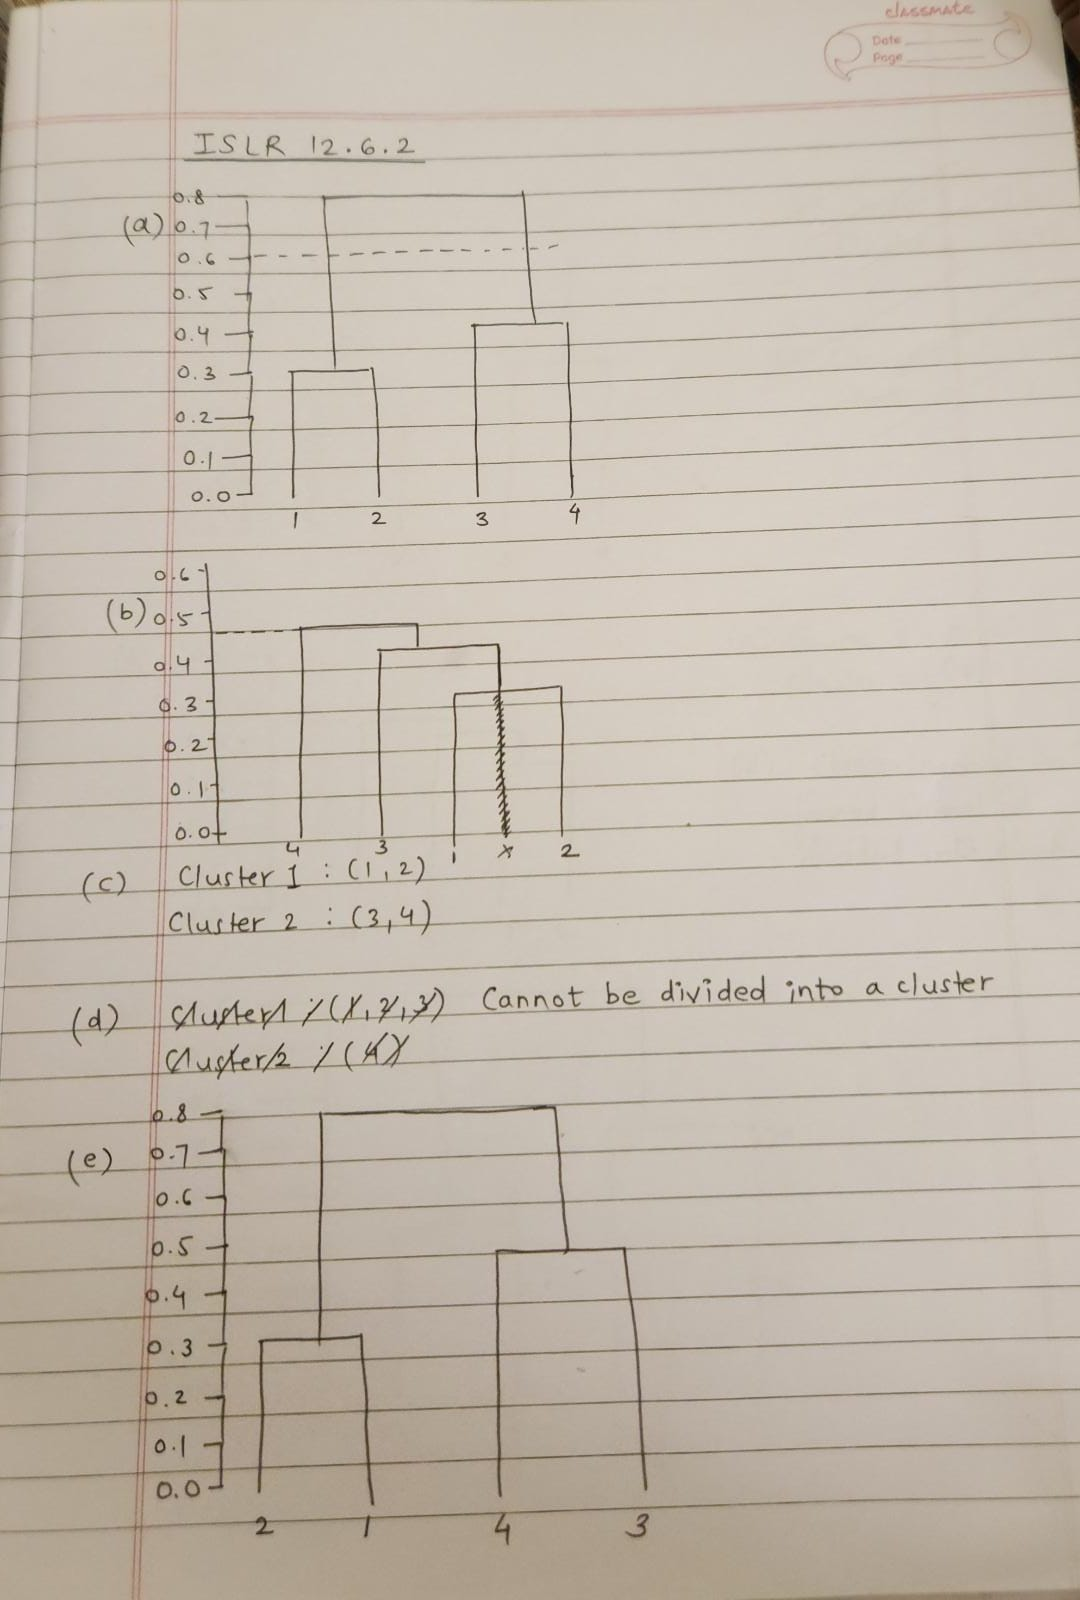